Автор: Лейман Максим  

Дата создания: 18.06.2025

# Промежуточная аттестация 4.  

## Детекция лиц на изображении



In [1]:
!ls dataset/dataset_3

test	    test.csv  train_2	   train.csv	   training_renamed.csv
test_0.csv  train     train_2.csv  training_0.csv


# Импорты

In [8]:
# from train.trainer import train
# from data.dataset import FaceKeypointsDataset, annotation_transform, rename_images_and_update_csv, convert_xml_to_csv_with_renaming
# from utils.visualization import img_show, show_batch_with_keypoints, show_image_with_predictions, show_original_image_with_predictions
from models.keypoint_net import KeypointNet



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
import torch
from torch.utils.data import Dataset, DataLoader
from IPython.display import clear_output


# 1) Модель

In [3]:
import cv2
from matplotlib import pyplot as plt
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations
plt.rcParams["figure.figsize"] = (10, 10)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Загружаем изображение
# device='cpu'
# Детектируем лица и ключевые точки
model = get_model("resnet50_2020-07-20", max_size=1024, device=device)
model.eval()



/home/maksim/anaconda3/envs/myenv3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/maksim/anaconda3/envs/myenv3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/maksim/anaconda3/envs/myenv3/lib/python3.10/site-packages/torch/hub.py:874: FutureWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  return _legacy_zip_load(cached_file, model_dir, map_location, weights_only)


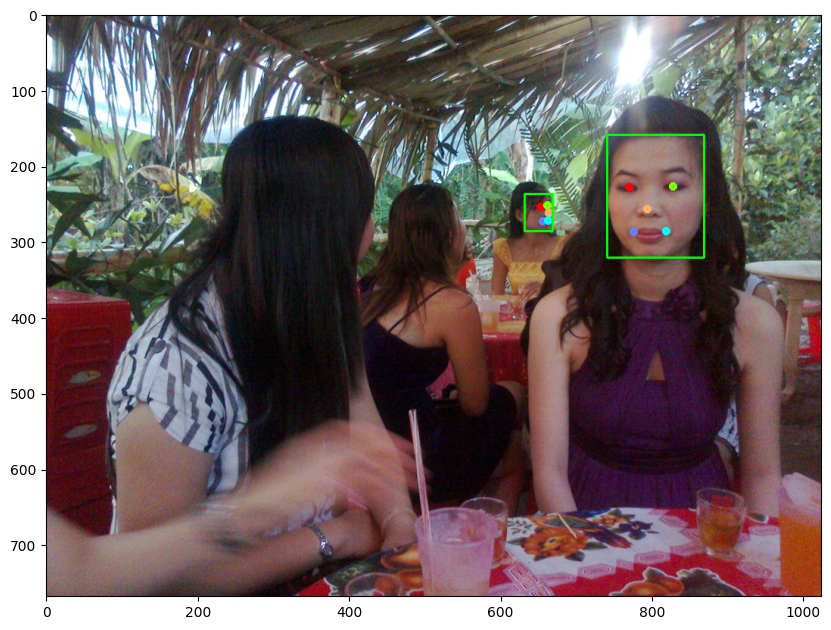

In [ ]:
img = cv2.imread('/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/val/0046c490ad699ce9.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
annotation = model.predict_jsons(img)
plt.imshow(vis_annotations(img, annotation))

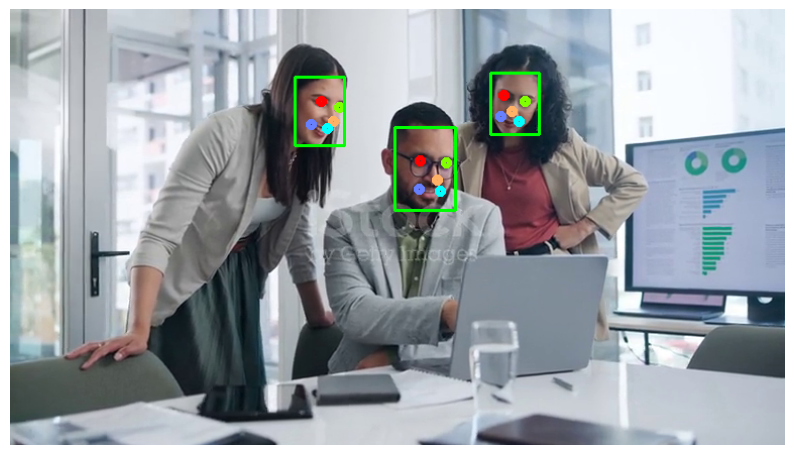

In [ ]:
import cv2
import torch
from retinaface.pre_trained_models import get_model
from retinaface.utils import vis_annotations
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Загружаем модель 
model = get_model("resnet50_2020-07-20", max_size=1024, device=device)
model.eval()

# Открываем видео
video_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/videos/2.mp4"
cap = cv2.VideoCapture(video_path)

# Параметры для записи видео
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter("output_video.mp4", fourcc, fps, (width, height))

while True:
    clear_output(wait=True)
    ret, frame = cap.read()
    if not ret:
        break

    # Конвертируем кадр из BGR в RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Детекция лиц
    annotation = model.predict_jsons(img_rgb)

    # Визуализация аннотаций на RGB изображении
    img_vis = vis_annotations(img_rgb, annotation)

    # Конвертируем обратно в BGR для OpenCV
    img_bgr = cv2.cvtColor(img_vis, cv2.COLOR_RGB2BGR)

    # Показываем кадр с детекцией
    # cv2.imshow("Face Detection", img_bgr)


    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


    # Записываем кадр в выходное видео (если нужно)
    out.write(img_bgr)

    # Выход по нажатию клавиши q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождаем ресурсы
cap.release()
out.release()
cv2.destroyAllWindows()


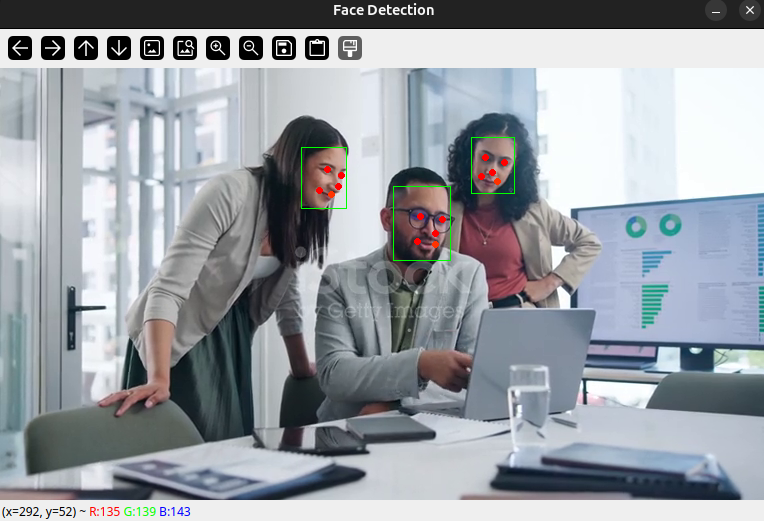